In [1]:
!pip install scipy
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:

# Path to your .mat files
lr_data_path = './LR_data_160.mat'
hr_data_path = './HR_data_268.mat'

# Load the data
lr_data = loadmat(lr_data_path)
hr_data = loadmat(hr_data_path)


In [3]:
# Print the keys to see what variables are inside
print("LR Data Keys:", lr_data.keys())
print("HR Data Keys:", hr_data.keys())

# Print basic information about 'LR' and 'HR' variables
print("LR Data Type:", type(lr_data['LR']))
print("LR Data Shape:", lr_data['LR'].shape)

print("HR Data Type:", type(hr_data['HR']))
print("HR Data Shape:", hr_data['HR'].shape)

# If the data types are numpy arrays and not too large, you can print a small part of them
# Adjust the slicing as needed to avoid printing too much data
print("Sample from LR Data:", lr_data['LR'][:5])  # Adjust the index range as needed
print("Sample from HR Data:", hr_data['HR'][:5])  # Adjust the index range as needed


LR Data Keys: dict_keys(['__header__', '__version__', '__globals__', 'LR'])
HR Data Keys: dict_keys(['__header__', '__version__', '__globals__', 'HR'])
LR Data Type: <class 'numpy.ndarray'>
LR Data Shape: (279, 12720)
HR Data Type: <class 'numpy.ndarray'>
HR Data Shape: (279, 35778)
Sample from LR Data: [[ 0.20714622 -0.04054347  0.12503607 ...  0.63710991  0.70365309
   0.60782222]
 [ 0.3908859   0.39850229  0.11586828 ...  0.64338081  0.50101241
   0.61371498]
 [ 0.65978896  0.00443189  0.07657352 ...  0.60211352  0.48951707
   0.36731095]
 [ 0.59170497  0.20461215  0.17504631 ...  0.57397573  0.39319476
   0.42591312]
 [ 0.38155641  0.00840382  0.70467227 ...  0.34827505  0.43189934
   0.39324965]]
Sample from HR Data: [[0.55897271 0.46061736 0.69920946 ... 0.38795068 0.73178632 0.82595272]
 [0.89749013 0.8184413  0.8080303  ... 0.51561432 0.63381379 0.91403309]
 [0.66005707 0.51145124 0.80126747 ... 0.45575734 0.49762593 0.75255075]
 [0.50861981 0.41432901 0.83404337 ... 0.25255113

## 0. Arrays Description

1. **Data Structure**: Both `LR` and `HR` variables are stored as NumPy arrays, which is a very flexible and powerful data structure for numerical data manipulation and analysis in Python.

2. **Data Shape**: 
   - The `LR` data has a shape of `(279, 12720)`, indicating it consists of 279 rows and 12,720 columns. This could represent 279 samples with 12,720 features each, depending on the context of your data.
   - The `HR` data has a shape of `(279, 35778)`, which suggests it also consists of 279 samples but with 35,778 features each. This implies a higher resolution or more detailed measurements compared to the `LR` data, which is consistent with the naming convention (LR for Low Resolution and HR for High Resolution).


### Pre-processing

In [4]:
lr_array = lr_data['LR']  
hr_array = hr_data['HR']

# Replace all negative values with 0
lr_array[lr_array < 0] = 0
hr_array[hr_array < 0] = 0

# Replace any 'NaN' values with 0
np.nan_to_num(lr_array, copy=False)
np.nan_to_num(hr_array, copy=False)


array([[0.55897271, 0.46061736, 0.69920946, ..., 0.38795068, 0.73178632,
        0.82595272],
       [0.89749013, 0.8184413 , 0.8080303 , ..., 0.51561432, 0.63381379,
        0.91403309],
       [0.66005707, 0.51145124, 0.80126747, ..., 0.45575734, 0.49762593,
        0.75255075],
       ...,
       [0.58769249, 0.58726456, 0.84192695, ..., 0.        , 0.65398088,
        0.79327276],
       [0.60954847, 0.69367541, 0.77478356, ..., 0.        , 0.36799391,
        0.64139445],
       [0.33296495, 0.        , 0.64504899, ..., 0.43059995, 0.25287228,
        0.52606613]])

## 1. Basic Statistics


In [5]:
  

# Define a function to calculate statistics and return them in a dictionary
def calculate_statistics(data):
    statistics = {
        'Mean': np.mean(data),
        'Median': np.median(data),
        'Standard Deviation': np.std(data),
        'Min': np.min(data),
        'Max': np.max(data)
    }
    return statistics

# Calculate statistics for LR and HR data
lr_stats = calculate_statistics(lr_array)
hr_stats = calculate_statistics(hr_array)

# Create a DataFrame to hold the statistics for comparison
df_stats = pd.DataFrame({'LR Data': lr_stats, 'HR Data': hr_stats})

# Round the numbers to four decimal places for better readability
df_stats = df_stats.round(4)

df_stats


,LR Data,HR Data
Mean,0.1960,0.2572
Median,0.1483,0.2302
Standard Deviation,0.2002,0.2221
Min,0.0000,0.0000
Max,0.9990,0.9999


## 2. Distribution Visualization


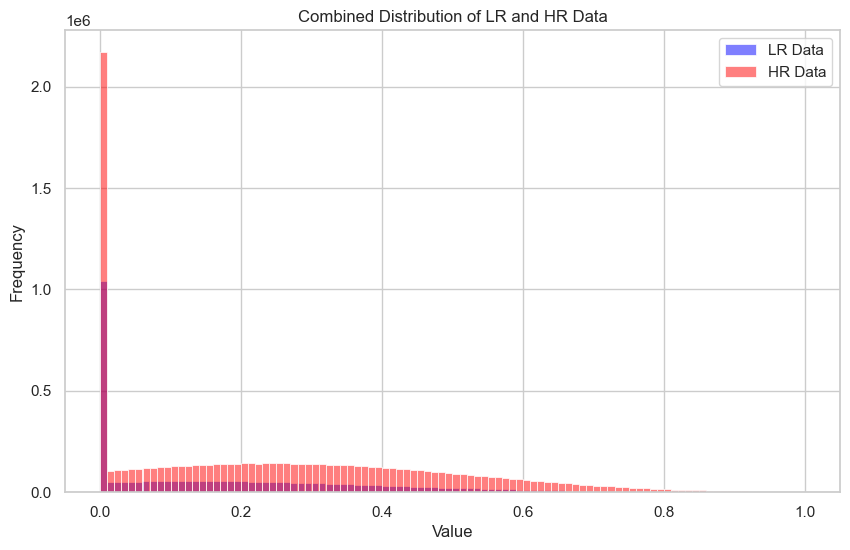

In [6]:

lr_array = lr_data['LR']  
hr_array = hr_data['HR']  

# Setting the Seaborn theme for nice aesthetics
sns.set_theme(style="whitegrid")

# Plotting histograms on the same figure for comparison
plt.figure(figsize=(10, 6))

# Making histograms semi-transparent with alpha and using a higher bin count for finer detail
sns.histplot(lr_array.flatten(), bins=100, color='blue', alpha=0.5, label='LR Data')
sns.histplot(hr_array.flatten(), bins=100, color='red', alpha=0.5, label='HR Data')

# Adding titles and labels
plt.title('Combined Distribution of LR and HR Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Adding a legend to differentiate between LR and HR data
plt.legend()

plt.show()


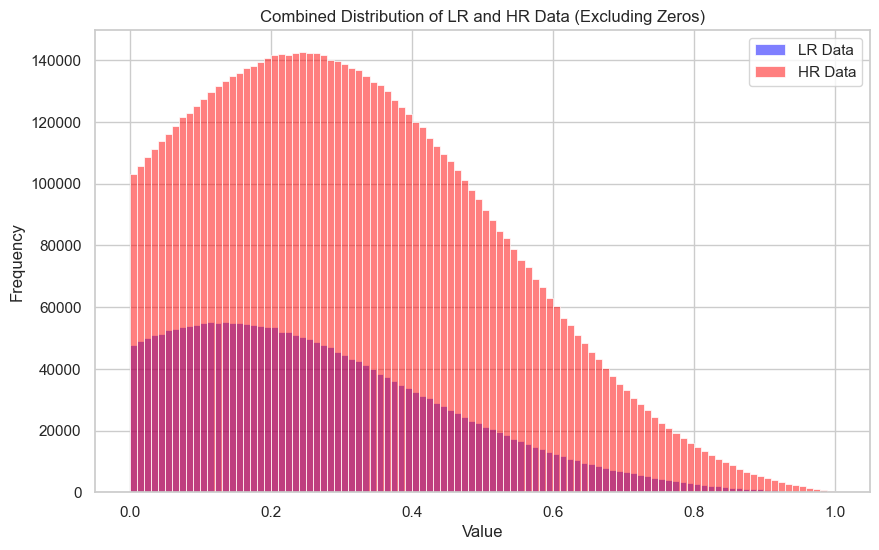

In [7]:
# Setting the Seaborn theme for aesthetics
sns.set_theme(style="whitegrid")

# Plotting histograms on the same figure for comparison, excluding zeros
plt.figure(figsize=(10, 6))

# Making histograms semi-transparent with alpha and using a higher bin count for finer detail
# We filter out the zeros using lr_array[lr_array > 0].flatten() and hr_array[hr_array > 0].flatten()
sns.histplot(lr_array[lr_array > 0].flatten(), bins=100, color='blue', alpha=0.5, label='LR Data')
sns.histplot(hr_array[hr_array > 0].flatten(), bins=100, color='red', alpha=0.5, label='HR Data')

# Adding titles and labels
plt.title('Combined Distribution of LR and HR Data (Excluding Zeros)')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Adding a legend to differentiate between LR and HR data
plt.legend()

# Display the plot
plt.show()

## 3. Feature Matrix Heatmap Visualization

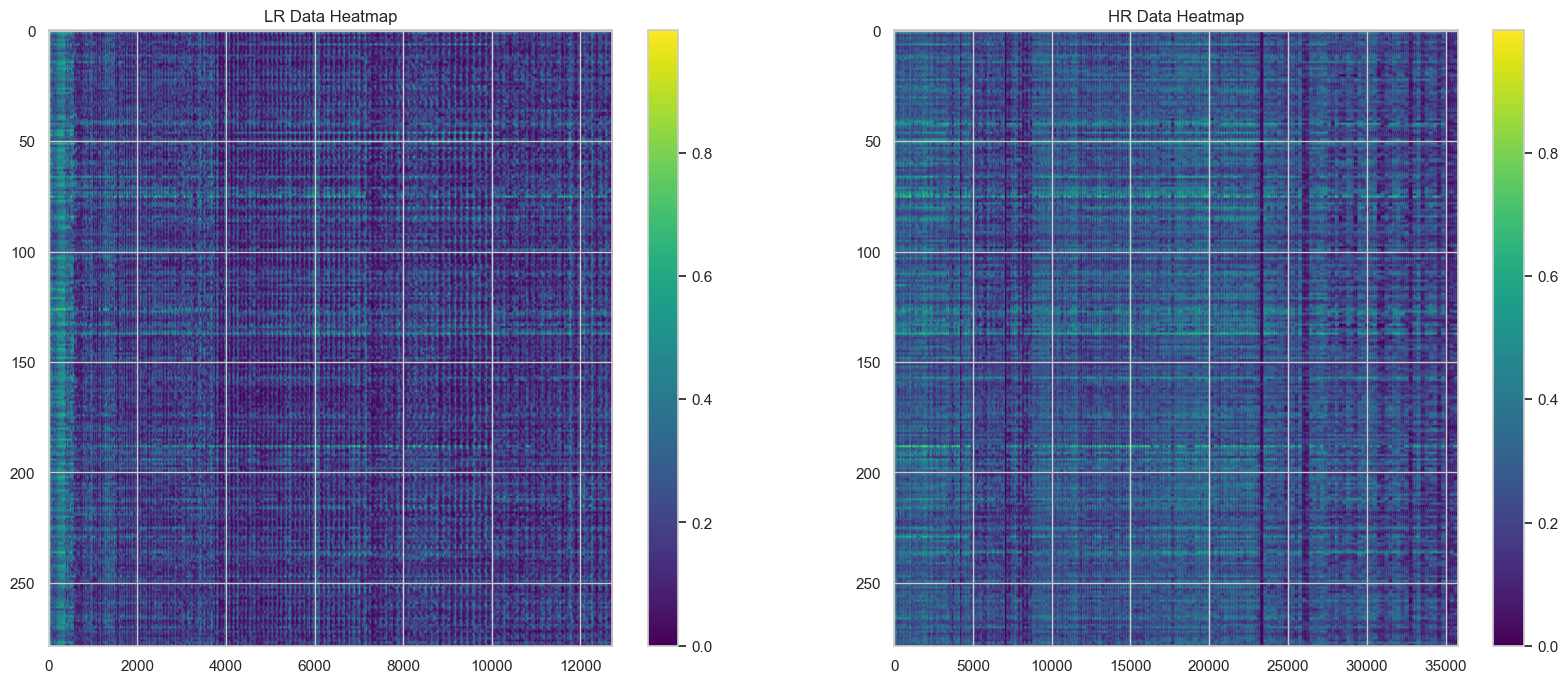

In [8]:
plt.figure(figsize=(20, 8))

# Heatmap of a subset of LR data
plt.subplot(1, 2, 1)
plt.imshow(lr_array, aspect='auto', cmap='viridis')  # Adjust subset size as needed
plt.colorbar()
plt.title('LR Data Heatmap')

# Heatmap of a subset of HR data
plt.subplot(1, 2, 2)
plt.imshow(hr_array, aspect='auto', cmap='viridis')  # Adjust subset size as needed
plt.colorbar()
plt.title('HR Data Heatmap')

plt.show()


## 4. Brain graph adjacency matrix Heatmap Visualization 

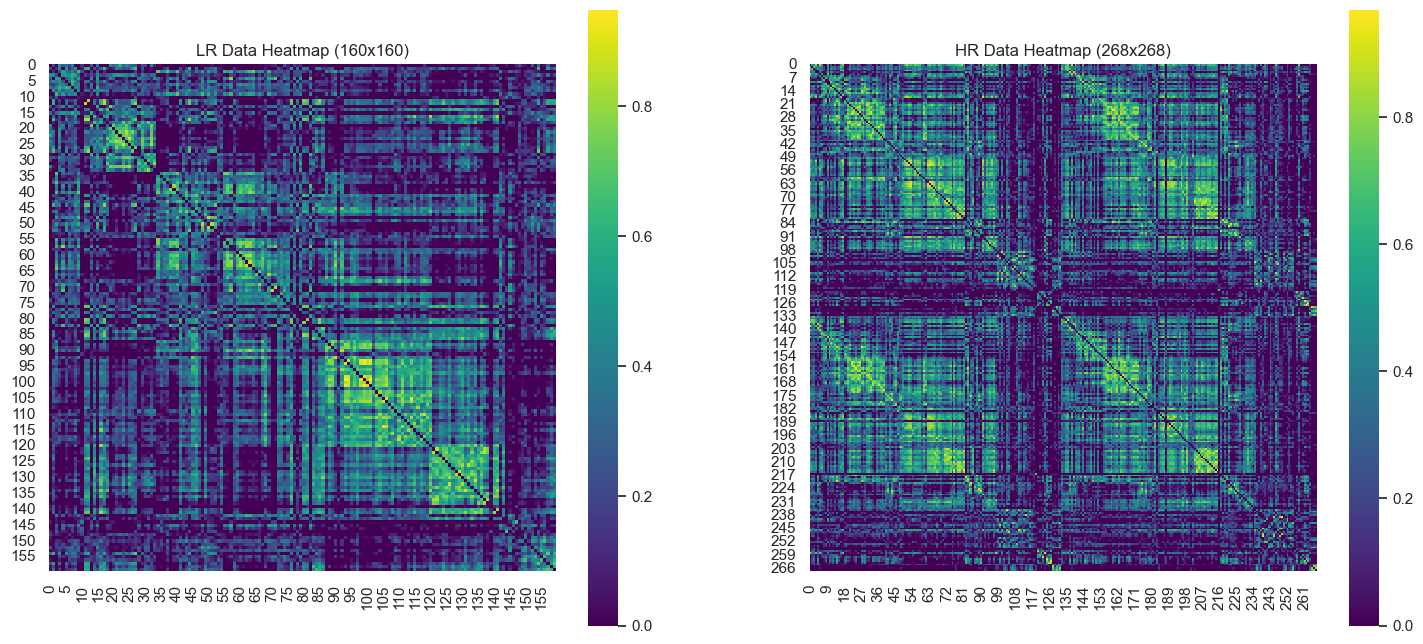

In [9]:
i = 0

import numpy as np

class MatrixVectorizer:
    """
    A class for transforming between matrices and vector representations.
    
    This class provides methods to convert a symmetric matrix into a vector (vectorize)
    and to reconstruct the matrix from its vector form (anti_vectorize), focusing on 
    vertical (column-based) traversal and handling of elements.
    """

    def __init__(self):
        """
        Initializes the MatrixVectorizer instance.
        
        The constructor currently does not perform any actions but is included for 
        potential future extensions where initialization parameters might be required.
        """
        pass

    @staticmethod
    def vectorize(matrix, include_diagonal=False):
        """
        Converts a matrix into a vector by vertically extracting elements.
        
        This method traverses the matrix column by column, collecting elements from the
        upper triangle, and optionally includes the diagonal elements immediately below
        the main diagonal based on the include_diagonal flag.
        
        Parameters:
        - matrix (numpy.ndarray): The matrix to be vectorized.
        - include_diagonal (bool, optional): Flag to include diagonal elements in the vectorization.
          Defaults to False.
        
        Returns:
        - numpy.ndarray: The vectorized form of the matrix.
        """
        # Determine the size of the matrix based on its first dimension
        matrix_size = matrix.shape[0]

        # Initialize an empty list to accumulate vector elements
        vector_elements = []

        # Iterate over columns and then rows to collect the relevant elements
        for col in range(matrix_size):
            for row in range(matrix_size):
                # Skip diagonal elements if not including them
                if row != col:  
                    if row < col:
                        # Collect upper triangle elements
                        vector_elements.append(matrix[row, col])
                    elif include_diagonal and row == col + 1:
                        # Optionally include the diagonal elements immediately below the diagonal
                        vector_elements.append(matrix[row, col])

        return np.array(vector_elements)

    @staticmethod
    def anti_vectorize(vector, matrix_size, include_diagonal=False):
        """
        Reconstructs a matrix from its vector form, filling it vertically.
        
        The method fills the matrix by reflecting vector elements into the upper triangle
        and optionally including the diagonal elements based on the include_diagonal flag.
        
        Parameters:
        - vector (numpy.ndarray): The vector to be transformed into a matrix.
        - matrix_size (int): The size of the square matrix to be reconstructed.
        - include_diagonal (bool, optional): Flag to include diagonal elements in the reconstruction.
          Defaults to False.
        
        Returns:
        - numpy.ndarray: The reconstructed square matrix.
        """
        # Initialize a square matrix of zeros with the specified size
        matrix = np.zeros((matrix_size, matrix_size))

        # Index to keep track of the current position in the vector
        vector_idx = 0

        # Fill the matrix by iterating over columns and then rows
        for col in range(matrix_size):
            for row in range(matrix_size):
                # Skip diagonal elements if not including them
                if row != col:  
                    if row < col:
                        # Reflect vector elements into the upper triangle and its mirror in the lower triangle
                        matrix[row, col] = vector[vector_idx]
                        matrix[col, row] = vector[vector_idx]
                        vector_idx += 1
                    elif include_diagonal and row == col + 1:
                        # Optionally fill the diagonal elements after completing each column
                        matrix[row, col] = vector[vector_idx]
                        matrix[col, row] = vector[vector_idx]
                        vector_idx += 1

        return matrix



# Now, we use the function for LR and HR data with the right flags
lr_vector = lr_data['LR'][i, :]
hr_vector = hr_data['HR'][i, :]

# Now, we use the function for LR and HR data with the right flags
lr_matrix = MatrixVectorizer.anti_vectorize(lr_vector, 160, include_diagonal=False)  
hr_matrix = MatrixVectorizer.anti_vectorize(hr_vector, 268, include_diagonal=False) 

# Plot the heatmaps
plt.figure(figsize=(18, 8))

# LR Data Heatmap
plt.subplot(1, 2, 1)
sns.heatmap(lr_matrix, square=True, cmap='viridis')
plt.title('LR Data Heatmap (160x160)')

# HR Data Heatmap
plt.subplot(1, 2, 2)
sns.heatmap(hr_matrix, square=True, cmap='viridis')
plt.title('HR Data Heatmap (268x268)')

plt.show()

### A Toy Example to demonestrate the innerwork of vectorization and  anti-vecotrize function

In [10]:
# Toy vector for demonstration
toy_vector = np.array([1, 2, 3, 4, 5, 6])  # This is a vectorized upper triangular part of a 4x4 matrix

# The matrix_size is 4 for our toy example
matrix_size = 4

# We call the anti_vectorize function with include_diagonal=False since we are not including the diagonal
toy_matrix = MatrixVectorizer.anti_vectorize(toy_vector, matrix_size, include_diagonal=False)

toy_matrix


array([[0., 1., 2., 4.],
       [1., 0., 3., 5.],
       [2., 3., 0., 6.],
       [4., 5., 6., 0.]])

In [11]:

vectorized_matrix = MatrixVectorizer.vectorize(toy_matrix, include_diagonal=False)

vectorized_matrix

array([1., 2., 3., 4., 5., 6.])